In [1]:
# Dataset: https://www.kaggle.com/shrutimehta/zomato-restaurants-data


"""
For this project you’ll be taking a dataset, loading it into a database, and then leveraging the database to develop some analytical insights. The datasets cover a variety of topics and formats. Your first task will be to determine which database system you think will work best with your selected dataset. At that point you will need to write a script, or leverage tools for the database, to load the dataset. Once the information has been loaded, you will need to query the database to create your insights.
"""

# Database being used: MySQL

import pymysql.cursors
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the database
conn = pymysql.connect(host='gwumysql-restore.cazdwdlcg6dm.us-east-2.rds.amazonaws.com',
                             user='EMSE6992',
                             port=3306,
                             db='test_db',
                             password='MySQLpass',
                             cursorclass=pymysql.cursors.DictCursor)

cursor = conn.cursor()

In [2]:
cursor.execute("SELECT * from zomato")
result = cursor.fetchall()

# convert the result to a dataframe
df = pd.DataFrame.from_dict(result)

df

,Restaurant ID,Country Code,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,162,Makati City,121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,162,Makati City,121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,162,Mandaluyong City,121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,162,Mandaluyong City,121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,162,Mandaluyong City,121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,208,??stanbul,28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,208,??stanbul,29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,208,??stanbul,29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,208,??stanbul,29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


    Country Code  Restaurant ID         Country
0              1            116           India
1             14              1       Australia
2             30             16          Brazil
3             94              7       Indonesia
4            148             12     New Zealand
5            162             12     Phillipines
6            166              4           Qatar
7            189             12    South Africa
8            191              2       Sri Lanka
9            208             10          Turkey
10           214             18             UAE
11           215             23  United Kingdom
12           216             68   United States


Text(0.5, 1.0, '4.5+ rating restaurants in each country')

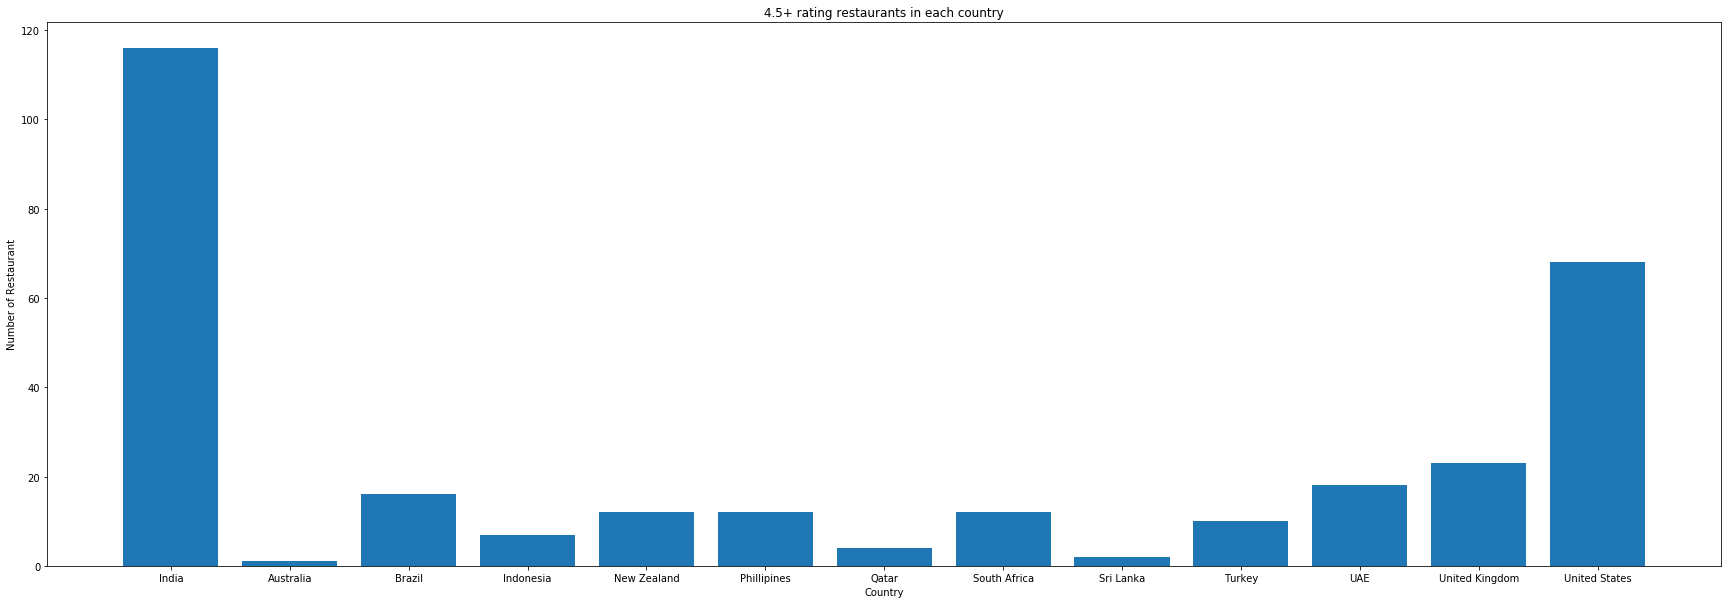

In [43]:
# First query: Countries with the number of popular restaurants - use highest rating per resturant (4.8+)

cursor.execute("SELECT * FROM test_db.zomato WHERE `Aggregate rating`>= 4.5 order by `Country Code` asc")
result = cursor.fetchall()
df = pd.DataFrame.from_dict(result)

best_resturants = df.groupby(['Country Code'], as_index=False).count()[['Country Code', 'Restaurant ID']]
country = pd.read_excel('Country-Code.xlsx')
data = pd.merge(best_resturants, country, on='Country Code')

print(data)

plt.figure(figsize=(30,10))
plt.bar(data['Country'], data['Restaurant ID'])
plt.xlabel('Country')
plt.ylabel('Number of Restaurant')
plt.title('4.5+ rating restaurants in each country')

    Average Rating  Country Code
0         2.523324             1
1         3.658333            14
2         3.763333            30
3         3.575000            37
4         4.295238            94
5         4.262500           148
6         4.468182           162
7         4.060000           166
8         3.575000           184
9         4.210000           189
10        3.870000           191
11        4.300000           208
12        4.233333           214
13        4.087500           215
14        4.004378           216


<BarContainer object of 15 artists>

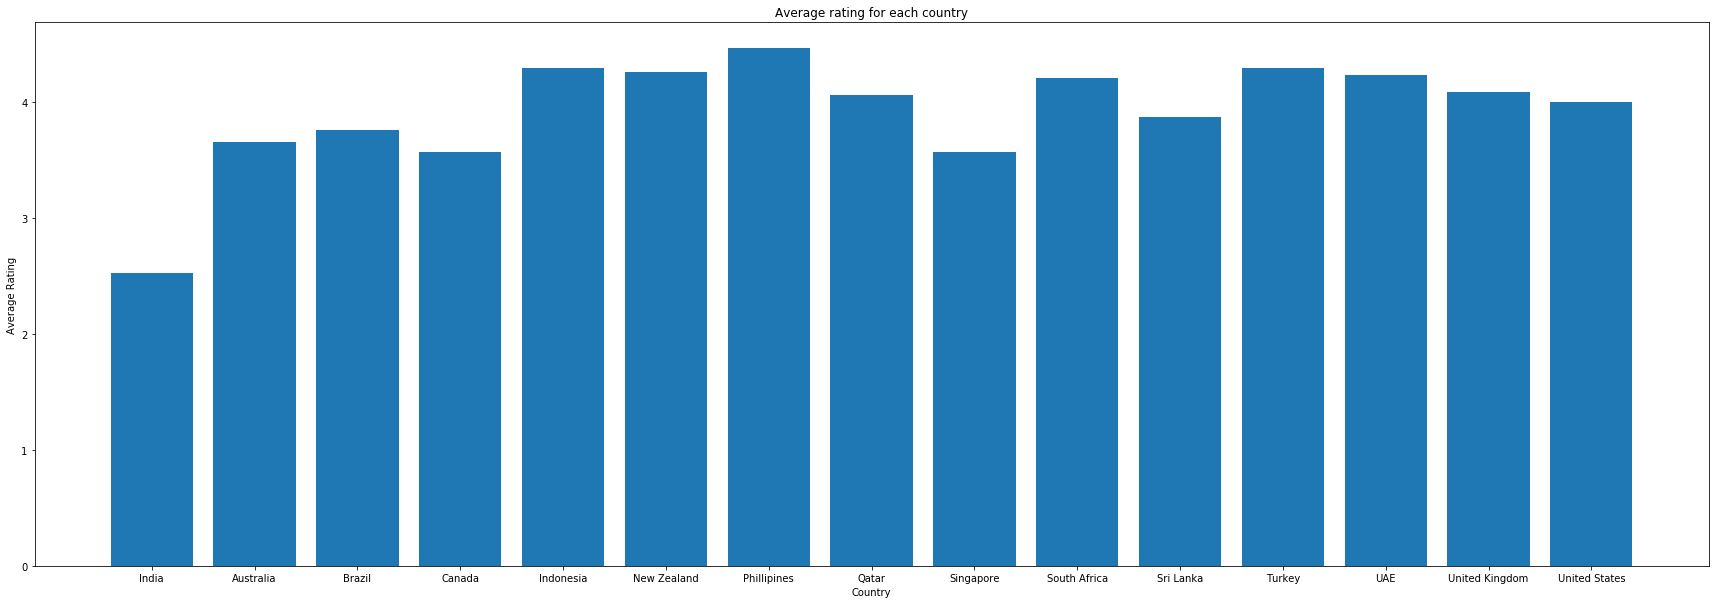

In [25]:
# Second query: Average rating in each country for resturants

cursor.execute("SELECT Avg(`Aggregate rating`) as `Average Rating`, `Country Code` FROM test_db.zomato group by `Country Code`")
result = cursor.fetchall()
df = pd.DataFrame.from_dict(result)

country = pd.read_excel('Country-Code.xlsx')
data = pd.merge(df, country, on='Country Code')

print(df)

plt.figure(figsize=(30,10))
plt.xlabel('Country')
plt.ylabel('Average Rating')
plt.title('Average rating for each country')
plt.bar(data['Country'], data['Average Rating'])



      average rating                               Cuisines
38              4.90           American, Caribbean, Seafood
94              4.90                American, Sandwich, Tea
1780            4.90                      Sunda, Indonesian
18              4.90                American, BBQ, Sandwich
684             4.90                    Continental, Indian
950             4.90                      Hawaiian, Seafood
1215            4.90        Mexican, American, Healthy Food
804             4.90                 European, Contemporary
809             4.90                       European, German
1287            4.90                      Mughlai, Lucknowi
216             4.90               BBQ, Breakfast, Southern
797             4.90                European, Asian, Indian
1063            4.90                          Italian, Deli
34              4.90                American, Burger, Grill
42              4.90               American, Coffee and Tea
1035            4.90           Italian, 

<BarContainer object of 10 artists>

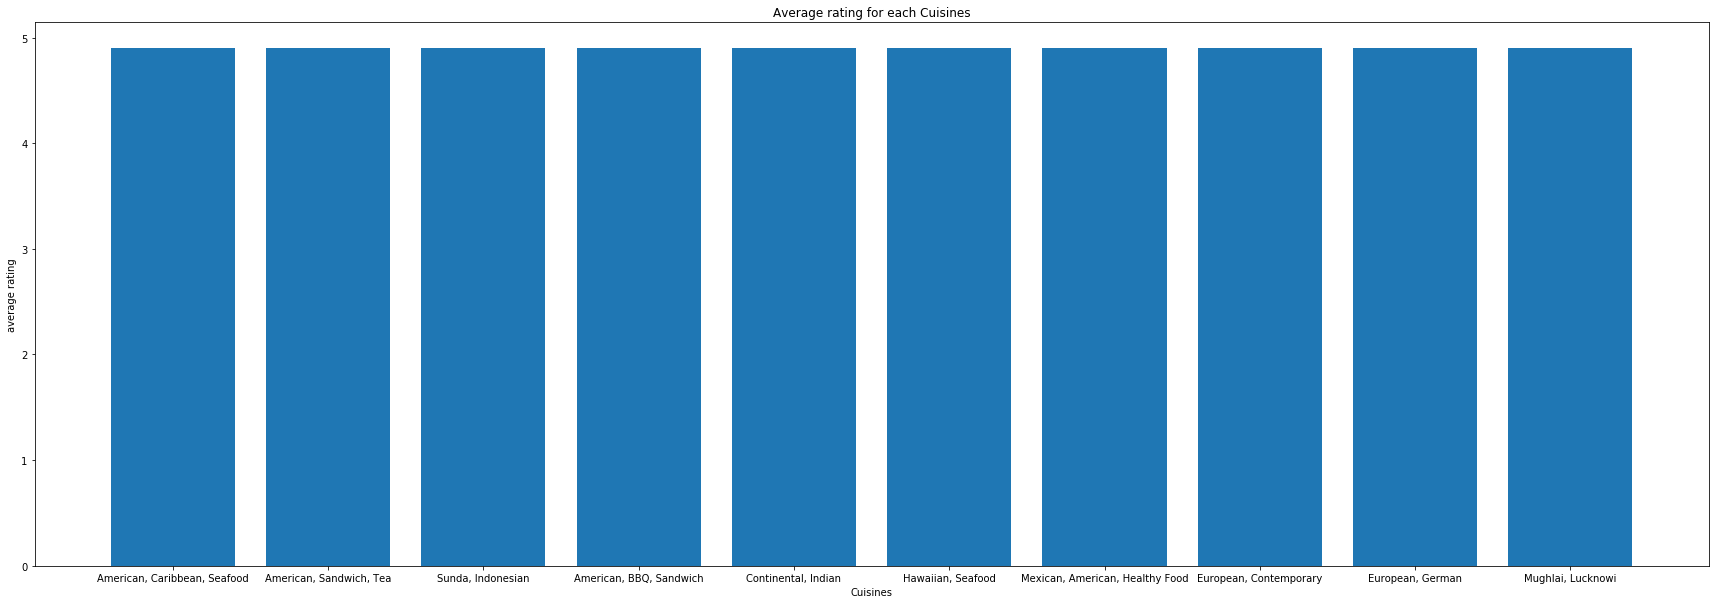

In [38]:
# Third Query: The top rated Cuisines in the dataset

cursor.execute("SELECT AVG(`Aggregate rating`) as `average rating`, `Cuisines` FROM test_db.zomato group by Cuisines")
result = cursor.fetchall()
df = pd.DataFrame.from_dict(result)

data = (df.sort_values(['average rating'], ascending=False))

# Print out the first 25 Cuisines to see the difference, but can only plot the first 10 to show the visibilitys
print(data.head(25))

plt.figure(figsize=(30,10))
plt.xlabel('Cuisines')
plt.ylabel('average rating')
plt.title('Average rating for each Cuisines')
plt.bar(data.head(10)['Cuisines'], data.head(10)['average rating'])



In [5]:

# Fourth query: if the place has online delievery does it have higher rating



# Fifth: if the place has table booking does it have higher rating

# Sixth: price point that yields highest rating -- or something of the sort

# 7th - look at different localities in the countries and see the popular areas for resturants

# 8th - price range vs ratings text and see if a resturant that has a higher price range is more popular

# 9th - most reviewed countries

